# **Using Project class in pyAutomagic**
A Project contains the entire relevant information for each project. Main steps to ensure smooth running includes:


*   Initialization
*   Preprocess
*   Interpolate



# *Initialization*

We have restricted the overall package to be used with BIDS specifications.Set name as the project name of your choice. Set the data folder as the path to your BIDS folder. Correct file extension should be set according to the raw files in your dataset. Set the montage string as one of that MNE will recognize as the EEG montage you are using. According to the dataset, the sampling rate also needs to be set. Also, the preprocessing parameters need to be set as a dictionary as seen in the code below. These parameters are line frequency, filter type, filter frequency, filter length, whether or not to perform EOG regression, lambda , tolerance, maximum iterations, reference channels, eval channels and re-reference channels.




In [1]:
import os
import sys
import warnings
# warnings.filterwarnings("ignore")
pyautomagic_dir = os.path.abspath(os.path.dirname(os.getcwd()))
sys.path.append(pyautomagic_dir)
from pyautomagic.src.Project import Project

name = "Tutorial project"
data_folder = os.path.join("..", "tests", "test_data", "test_project")
file_ext = ".set"
montage = "biosemi128"
sample_rate = 500
channels = []
for i in range(128):
    channels.append('E'+str(i+1))

params = {'line_freqs' : 50,'filter_type' : 'high', 'filt_freq' : None,'filter_length' : 'auto','eog_regression' : False,'lam' : -1,'tol' : 1e-7,'max_iter': 1000,'interpolation_params': {'line_freqs' : 50,'ref_chs': channels, 'reref_chs': channels,'montage': montage}}

2020-02-06 14:30:23,887 : DEBUG: $HOME=/Users/jennytrieu
2020-02-06 14:30:23,888 : DEBUG: CONFIGDIR=/Users/jennytrieu/.matplotlib
2020-02-06 14:30:23,889 : DEBUG: matplotlib data path: /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/mpl-data
2020-02-06 14:30:23,893 : DEBUG: loaded rc file /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc
2020-02-06 14:30:23,896 : DEBUG: matplotlib version 3.1.1
2020-02-06 14:30:23,896 : DEBUG: interactive is False
2020-02-06 14:30:23,897 : DEBUG: platform is darwin
2020-02-06 14:30:23,898 : DEBUG: loaded modules: ['sys', 'builtins', '_frozen_importlib', '_imp', '_thread', '_warnings', '_weakref', 'zipimport', '_frozen_importlib_external', '_io', 'marshal', 'posix', 'encodings', 'codecs', '_codecs', 'encodings.aliases', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', 'io', 'abc', '_abc', '_bootlocale', '_locale', 'site', 'os', 'stat', '_s

2020-02-06 14:30:23,943 : DEBUG: CACHEDIR=/Users/jennytrieu/.matplotlib
2020-02-06 14:30:23,946 : DEBUG: Using fontManager instance from /Users/jennytrieu/.matplotlib/fontlist-v310.json
2020-02-06 14:30:24,050 : DEBUG: Loaded backend module://ipykernel.pylab.backend_inline version unknown.
2020-02-06 14:30:24,418 : DEBUG: Loaded backend module://ipykernel.pylab.backend_inline version unknown.


The project class can be initialized with above mentioned parameters.

In [2]:
import warnings
warnings.filterwarnings("ignore")
tutorial_project = Project(name, data_folder, file_ext, montage, sample_rate, params)

2020-02-06 14:30:28,226 : INFO: Setting up project. Please wait...
2020-02-06 14:30:28,228 : INFO: Adding subject sub-18
2020-02-06 14:30:28,229 : INFO: ...Adding file sub-18_task-rest_eeg.set
2020-02-06 14:30:28,230 : INFO: Adding subject sub-66
2020-02-06 14:30:28,231 : INFO: ...Adding file sub-66_task-rest_eeg.set
2020-02-06 14:30:28,232 : INFO: **Project saved**



Writing '../tests/test_data/test_project/derivatives/automagic/Tutorial project_results.json'...

{}


When the project class is initialized, it looks into the data folder and creates a list of all the raw files. Correct listing of raw files can be checked from log, where both the subject name and file name is being logged.  

# *Preprocess*
After the data has been loaded correctly, use preprocess_all() method to process the raw files. This method goes through all the blocks in the block_list and processes them all one by one using Block's preprocess function. You can check the progress in log. Additionally it also saves the preprocessed data, 2 figures and reults JSON file for each block in the appropriate result folder.  

2020-02-06 14:30:30,882 : INFO: ----- START PREPROCESSING -----
2020-02-06 14:30:30,883 : INFO: Processing file sub-18_task-rest_eeg 1 out of 2


Reading channel info from ../tests/test_data/test_project/sub-18/eeg/sub-18_task-rest_channels.tsv.
prep
<DigMontage | 0 extras (headshape), 0 HPIs, 3 fiducials, 128 channels>
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302 sec)

Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302 sec)

Setting 

2020-02-06 14:30:35,937 : INFO: Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': ['E3'], 'bad_by_hf_noise': [], 'bad_by_correlation': [], 'bad_by_ransac': ['E1', 'E2', 'E3', 'E4', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E19', 'E20', 'E21', 'E22', 'E23', 'E24', 'E25', 'E26', 'E27', 'E28', 'E29', 'E30', 'E31', 'E32', 'E33', 'E34', 'E35', 'E36', 'E37', 'E39', 'E40', 'E41', 'E42', 'E44', 'E46', 'E47', 'E48', 'E49', 'E51', 'E52', 'E53', 'E54', 'E55', 'E56', 'E57', 'E58', 'E59', 'E60', 'E61', 'E64', 'E65', 'E66', 'E67', 'E69', 'E70', 'E71', 'E74', 'E76', 'E78', 'E79', 'E80', 'E82', 'E83', 'E84', 'E86', 'E87', 'E88', 'E92', 'E93', 'E97', 'E98', 'E102', 'E103', 'E104', 'E105', 'E106', 'E110', 'E111', 'E112', 'E116', 'E117', 'E121', 'E122', 'E124', 'E126', 'E127'], 'bad_all': ['E106', 'E27', 'E57', 'E23', 'E127', 'E19', 'E31', 'E122', 'E53', 'E41', 'E16', 'E24', 'E36', 'E56', 'E6', 'E22', 'E29', 'E58', 'E105', 'E83', 'E74', 'E88', 

Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302 sec)



2020-02-06 14:30:39,214 : INFO: Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': ['E3'], 'bad_by_hf_noise': [], 'bad_by_correlation': ['E45'], 'bad_by_ransac': ['E109', 'E106', 'E125', 'E27', 'E57', 'E23', 'E127', 'E19', 'E31', 'E122', 'E38', 'E53', 'E41', 'E16', 'E24', 'E36', 'E56', 'E6', 'E22', 'E29', 'E58', 'E105', 'E108', 'E113', 'E91', 'E83', 'E90', 'E74', 'E88', 'E63', 'E20', 'E67', 'E13', 'E33', 'E87', 'E69', 'E47', 'E37', 'E40', 'E102', 'E80', 'E82', 'E76', 'E44', 'E84', 'E81', 'E42', 'E21', 'E4', 'E12', 'E103', 'E28', 'E39', 'E50', 'E89', 'E96', 'E71', 'E17', 'E30', 'E7', 'E61', 'E95', 'E5', 'E25', 'E35', 'E68', 'E34', 'E85', 'E65', 'E26', 'E79', 'E45', 'E86', 'E104', 'E100', 'E2', 'E115', 'E3', 'E55', 'E59', 'E94', 'E97', 'E64', 'E114', 'E9', 'E48', 'E46', 'E121', 'E78', 'E10', 'E112', 'E99', 'E15', 'E52', 'E11', 'E93', 'E124', 'E8', 'E51', 'E32', 'E110', 'E101', 'E49', 'E60', 'E126', 'E1', 'E70', 'E54', 'E92', 'E117', 'E120', 'E119', 'E111', 'E73', 'E6

COBYLA failed to find a solution: Maximum number of function evaluations has been exceeded.
Computing interpolation matrix from 7 sensor positions
Interpolating 121 sensors


2020-02-06 14:30:39,289 : INFO: Iterations: 1


Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302 sec)



2020-02-06 14:30:42,446 : INFO: Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': ['E69', 'E3', 'E42'], 'bad_by_hf_noise': [], 'bad_by_correlation': ['E45'], 'bad_by_ransac': ['E109', 'E106', 'E125', 'E27', 'E57', 'E23', 'E127', 'E19', 'E31', 'E122', 'E38', 'E53', 'E56', 'E41', 'E24', 'E36', 'E16', 'E6', 'E22', 'E29', 'E58', 'E105', 'E108', 'E113', 'E91', 'E83', 'E90', 'E74', 'E88', 'E63', 'E20', 'E67', 'E13', 'E33', 'E87', 'E69', 'E47', 'E102', 'E40', 'E37', 'E80', 'E82', 'E76', 'E44', 'E84', 'E81', 'E42', 'E21', 'E4', 'E12', 'E103', 'E28', 'E39', 'E50', 'E89', 'E96', 'E71', 'E17', 'E30', 'E7', 'E61', 'E95', 'E5', 'E25', 'E35', 'E68', 'E34', 'E85', 'E65', 'E26', 'E79', 'E45', 'E86', 'E104', 'E100', 'E2', 'E115', 'E18', 'E3', 'E123', 'E55', 'E59', 'E94', 'E97', 'E64', 'E114', 'E9', 'E48', 'E128', 'E46', 'E121', 'E78', 'E10', 'E118', 'E112', 'E99', 'E15', 'E52', 'E11', 'E93', 'E124', 'E8', 'E51', 'E32', 'E110', 'E101', 'E49', 'E60', 'E126', 'E1', 'E70', 'E54', 'E92

COBYLA failed to find a solution: Maximum number of function evaluations has been exceeded.
Computing interpolation matrix from 3 sensor positions
Interpolating 125 sensors


2020-02-06 14:30:42,512 : INFO: Iterations: 2


Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302 sec)



2020-02-06 14:30:45,645 : INFO: Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': ['E69', 'E3', 'E42'], 'bad_by_hf_noise': [], 'bad_by_correlation': ['E45'], 'bad_by_ransac': ['E109', 'E106', 'E125', 'E27', 'E57', 'E23', 'E127', 'E19', 'E31', 'E122', 'E38', 'E53', 'E56', 'E16', 'E24', 'E41', 'E36', 'E6', 'E22', 'E29', 'E58', 'E105', 'E108', 'E113', 'E91', 'E83', 'E90', 'E74', 'E88', 'E63', 'E20', 'E67', 'E13', 'E33', 'E87', 'E69', 'E47', 'E37', 'E40', 'E102', 'E80', 'E82', 'E76', 'E44', 'E84', 'E81', 'E42', 'E21', 'E4', 'E12', 'E103', 'E28', 'E39', 'E50', 'E89', 'E96', 'E71', 'E17', 'E30', 'E7', 'E61', 'E95', 'E5', 'E25', 'E35', 'E68', 'E34', 'E85', 'E65', 'E26', 'E79', 'E45', 'E86', 'E104', 'E100', 'E2', 'E115', 'E18', 'E3', 'E123', 'E55', 'E59', 'E94', 'E97', 'E64', 'E114', 'E9', 'E48', 'E128', 'E46', 'E121', 'E78', 'E10', 'E118', 'E112', 'E99', 'E15', 'E52', 'E11', 'E93', 'E124', 'E8', 'E51', 'E32', 'E110', 'E101', 'E49', 'E60', 'E126', 'E1', 'E70', 'E54', 'E92

COBYLA failed to find a solution: Maximum number of function evaluations has been exceeded.
Computing interpolation matrix from 3 sensor positions
Interpolating 125 sensors
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302 sec)

Found 25 uniquely bad channels.

0 by n/a: []

0 by flat: []

2 by deviation: ['E3', 'E69']

0 by hf noise: []

0 by correl: []

0 by SNR []

0 by dropout: []

24 by ransac: ['E2', 'E3', 'E8', 'E9', 'E10', 'E14', 'E15', 'E16', 'E19', 'E21', 'E23', 'E25', 'E26', 'E27', 'E29', 'E32', 'E40', 'E42', 'E44', 'E56', 'E66', 'E71', 'E117', 'E127']
Computing interpolation matrix from 103 sensor positions
Interpolating 25 sens

2020-02-06 14:30:52,061 : WARNING: Lower pass-band freq is not given but is required. Default parametersfor high pass filtering will be used


filter
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Filter length: 3301 samples (6.602 sec)

eog_regression
rpca


2020-02-06 14:31:02,458 : DEBUG: locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x13749db90>
2020-02-06 14:31:02,459 : DEBUG: Using auto colorbar locator on colorbar
2020-02-06 14:31:02,460 : DEBUG: locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x13749db90>
2020-02-06 14:31:02,460 : DEBUG: Setting pcolormesh
2020-02-06 14:31:02,504 : DEBUG: locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x139b29d90>
2020-02-06 14:31:02,505 : DEBUG: Using auto colorbar locator on colorbar
2020-02-06 14:31:02,505 : DEBUG: locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x139b29d90>
2020-02-06 14:31:02,505 : DEBUG: Setting pcolormesh
2020-02-06 14:31:02,551 : DEBUG: locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x139bee390>
2020-02-06 14:31:02,552 : DEBUG: Using auto colorbar locator on colorbar
2020-02-06 14:31:02,552 : DEBUG: locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x139bee390>
2020-02-06 14:31:02,553 : DEBUG: Se


Writing '../tests/test_data/test_project/derivatives/automagic/sub-18/sub-18_task-rest_eeg_results.json'...

{
    "prep": {
        "performed": true
    },
    "filtering": {
        "performed": true
    },
    "perform_eog_regression": false,
    "perform_RPCA": true,
    "auto_bad_chans": [
        "E104",
        "E109",
        "E100",
        "E2",
        "E115",
        "E106",
        "E125",
        "E27",
        "E3",
        "E57",
        "E55",
        "E59",
        "E94",
        "E97",
        "E23",
        "E64",
        "E127",
        "E19",
        "E114",
        "E31",
        "E122",
        "E9",
        "E38",
        "E53",
        "E41",
        "E36",
        "E24",
        "E56",
        "E16",
        "E22",
        "E29",
        "E58",
        "E105",
        "E108",
        "E113",
        "E46",
        "E91",
        "E83",
        "E90",
        "E121",
        "E78",
        "E74",
        "E88",
        "E118",
        "E10",
        "E63",
 

Closing /Users/jennytrieu/Desktop/pyautomagic/tests/test_data/test_project/derivatives/automagic/sub-18/sub-18_task-rest_eeg_raw.fif [done]


2020-02-06 14:31:02,753 : DEBUG: findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
2020-02-06 14:31:02,753 : DEBUG: findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
2020-02-06 14:31:02,754 : DEBUG: findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05
2020-02-06 14:31:02,754 : DEBUG: findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05
2020-02-06 14:31:02,755 : DEBUG: findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymReg.ttf) normal normal regular normal>) = 10.05
2020-02-06 14:31:02,755 : DEBUG: findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05
2020-02-06 14:31:02,756 : DEBUG: findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymBol.ttf) normal normal bold normal>) = 10.335
2020-02-06 14:31:02,756 : DEBUG: findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05


2020-02-06 14:31:02,789 : DEBUG: findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Ultralight.otf) normal normal ultralight condensed>) = 10.535
2020-02-06 14:31:02,789 : DEBUG: findfont: score(<Font 'Apple Chancery' (Apple Chancery.ttf) normal normal 400 normal>) = 10.05
2020-02-06 14:31:02,790 : DEBUG: findfont: score(<Font 'STIXIntegralsD' (STIXIntDReg.otf) normal normal regular normal>) = 10.05
2020-02-06 14:31:02,791 : DEBUG: findfont: score(<Font 'PT Mono' (PTMono.ttc) normal normal bold normal>) = 10.335
2020-02-06 14:31:02,791 : DEBUG: findfont: score(<Font '.SF NS Text Condensed' (SFNSTextCondensed-Regular.otf) normal normal regular condensed>) = 10.25
2020-02-06 14:31:02,792 : DEBUG: findfont: score(<Font 'Skia' (Skia.ttf) normal normal 400 normal>) = 10.05
2020-02-06 14:31:02,792 : DEBUG: findfont: score(<Font 'Noto Sans Meetei Mayek' (NotoSansMeeteiMayek-Regular.ttf) normal normal regular normal>) = 10.05
2020-02-06 14:31:02,793 : DEBUG: findfont: score

2020-02-06 14:31:02,820 : DEBUG: findfont: score(<Font 'SignPainter' (SignPainter.ttc) normal normal 400 normal>) = 10.05
2020-02-06 14:31:02,821 : DEBUG: findfont: score(<Font 'Seravek' (Seravek.ttc) normal normal 400 normal>) = 10.05
2020-02-06 14:31:02,821 : DEBUG: findfont: score(<Font 'Oriya Sangam MN' (Oriya Sangam MN.ttc) normal normal 400 normal>) = 10.05
2020-02-06 14:31:02,822 : DEBUG: findfont: score(<Font 'Noto Sans Avestan' (NotoSansAvestan-Regular.ttf) normal normal regular normal>) = 10.05
2020-02-06 14:31:02,822 : DEBUG: findfont: score(<Font 'Khmer MN' (Khmer MN.ttc) normal normal 400 normal>) = 10.05
2020-02-06 14:31:02,823 : DEBUG: findfont: score(<Font 'Tahoma' (Tahoma.ttf) normal normal 400 normal>) = 10.05
2020-02-06 14:31:02,823 : DEBUG: findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.otf) italic normal 400 normal>) = 11.05
2020-02-06 14:31:02,824 : DEBUG: findfont: score(<Font 'Iowan Old Style' (Iowan Old Style.ttc) normal normal roman normal>) = 10.145
20

2020-02-06 14:31:02,851 : DEBUG: findfont: score(<Font 'STIXIntegralsUpSm' (STIXIntUpSmReg.otf) normal normal regular normal>) = 10.05
2020-02-06 14:31:02,852 : DEBUG: findfont: score(<Font 'STIXIntegralsD' (STIXIntDBol.otf) normal normal bold normal>) = 10.335
2020-02-06 14:31:02,852 : DEBUG: findfont: score(<Font 'Telugu MN' (Telugu MN.ttc) normal normal 400 normal>) = 10.05
2020-02-06 14:31:02,853 : DEBUG: findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.otf) normal normal bold normal>) = 10.335
2020-02-06 14:31:02,853 : DEBUG: findfont: score(<Font 'Brush Script MT' (Brush Script.ttf) italic normal 400 normal>) = 11.05
2020-02-06 14:31:02,854 : DEBUG: findfont: score(<Font 'Times New Roman' (Times New Roman Italic.ttf) italic normal roman normal>) = 11.145
2020-02-06 14:31:02,854 : DEBUG: findfont: score(<Font 'Noto Sans Brahmi' (NotoSansBrahmi-Regular.ttf) normal normal regular normal>) = 10.05
2020-02-06 14:31:02,854 : DEBUG: findfont: score(<Font 'Noto Sans Old Turkic' (NotoS

2020-02-06 14:31:02,886 : DEBUG: findfont: score(<Font 'Georgia' (Georgia Italic.ttf) italic normal 400 normal>) = 11.05
2020-02-06 14:31:02,886 : DEBUG: findfont: score(<Font 'STIXIntegralsUpD' (STIXIntUpDBol.otf) normal normal bold normal>) = 10.335
2020-02-06 14:31:02,887 : DEBUG: findfont: score(<Font 'STIXIntegralsSm' (STIXIntSmReg.otf) normal normal regular normal>) = 10.05
2020-02-06 14:31:02,887 : DEBUG: findfont: score(<Font 'Noto Sans Imperial Aramaic' (NotoSansImperialAramaic-Regular.ttf) normal normal regular normal>) = 10.05
2020-02-06 14:31:02,888 : DEBUG: findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W6.ttc) normal normal 700 normal>) = 10.335
2020-02-06 14:31:02,888 : DEBUG: findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.otf) italic normal bold normal>) = 11.335
2020-02-06 14:31:02,889 : DEBUG: findfont: score(<Font '.New York' (NewYorkItalic.ttf) italic normal 400 normal>) = 11.05
2020-02-06 14:31:02,889 : DEBUG: findfont: score(<Font 'Superclarendon' (S

2020-02-06 14:31:02,919 : DEBUG: findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W1.ttc) normal normal 400 normal>) = 10.05
2020-02-06 14:31:02,919 : DEBUG: findfont: score(<Font 'STIXIntegralsUpSm' (STIXIntUpSmBol.otf) normal normal bold normal>) = 10.335
2020-02-06 14:31:02,920 : DEBUG: findfont: score(<Font 'Chalkduster' (Chalkduster.ttf) normal normal 400 normal>) = 10.05
2020-02-06 14:31:02,920 : DEBUG: findfont: score(<Font 'Baghdad' (Baghdad.ttc) normal normal regular normal>) = 10.05
2020-02-06 14:31:02,921 : DEBUG: findfont: score(<Font 'Noto Sans Rejang' (NotoSansRejang-Regular.ttf) normal normal regular normal>) = 10.05
2020-02-06 14:31:02,921 : DEBUG: findfont: score(<Font 'Arial' (Arial Bold Italic.ttf) italic normal bold normal>) = 7.698636363636363
2020-02-06 14:31:02,922 : DEBUG: findfont: score(<Font 'Songti SC' (Songti.ttc) normal normal black normal>) = 10.525
2020-02-06 14:31:02,922 : DEBUG: findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymBol.otf) normal

2020-02-06 14:31:02,963 : DEBUG: findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 1.05
2020-02-06 14:31:02,964 : DEBUG: findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal bold normal>) = 11.335
2020-02-06 14:31:02,965 : DEBUG: findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal bold normal>) = 11.335
2020-02-06 14:31:02,965 : DEBUG: findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal bold normal>) = 10.335
2020-02-06 14:31:02,966 : DEBUG: findfont: score(<Font 'STIXNonUnicode' (STIXNonUni.ttf) normal normal regular normal>) = 10.05
2020-02-06 14:31:02,967 : DEBUG: findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal regular normal>) = 10.05
2020-02-06 14:31:02,967 : DEBUG: findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal bold normal>) = 11.335
2020-02-06 14:31:02,968 : DEBUG: findfont: score(<Font 'STIXGeneral' (STIXGeneral

2020-02-06 14:31:03,001 : DEBUG: findfont: score(<Font '.SF Compact Text' (SFCompactText.ttf) normal normal 400 normal>) = 10.05
2020-02-06 14:31:03,002 : DEBUG: findfont: score(<Font 'Rockwell' (Rockwell.ttc) normal normal 400 normal>) = 10.05
2020-02-06 14:31:03,002 : DEBUG: findfont: score(<Font 'Noto Sans Saurashtra' (NotoSansSaurashtra-Regular.ttf) normal normal regular normal>) = 10.05
2020-02-06 14:31:03,002 : DEBUG: findfont: score(<Font 'Gurmukhi Sangam MN' (Gurmukhi Sangam MN.ttc) normal normal 400 normal>) = 10.05
2020-02-06 14:31:03,003 : DEBUG: findfont: score(<Font 'Hiragino Sans GB' (Hiragino Sans GB.ttc) normal normal 400 normal>) = 10.05
2020-02-06 14:31:03,004 : DEBUG: findfont: score(<Font 'Hoefler Text' (Hoefler Text.ttc) normal normal 400 normal>) = 10.05
2020-02-06 14:31:03,004 : DEBUG: findfont: score(<Font 'Georgia' (Georgia Bold Italic.ttf) italic normal bold normal>) = 11.335
2020-02-06 14:31:03,005 : DEBUG: findfont: score(<Font 'Heiti TC' (STHeiti Light.ttc)

2020-02-06 14:31:03,035 : DEBUG: findfont: score(<Font 'Apple Braille' (Apple Braille.ttf) normal normal 400 normal>) = 10.05
2020-02-06 14:31:03,035 : DEBUG: findfont: score(<Font 'Bangla Sangam MN' (Bangla Sangam MN.ttc) normal normal 400 normal>) = 10.05
2020-02-06 14:31:03,036 : DEBUG: findfont: score(<Font 'Noto Sans PhagsPa' (NotoSansPhagsPa-Regular.ttf) normal normal regular normal>) = 10.05
2020-02-06 14:31:03,036 : DEBUG: findfont: score(<Font 'Wingdings 3' (Wingdings 3.ttf) normal normal 400 normal>) = 10.05
2020-02-06 14:31:03,037 : DEBUG: findfont: score(<Font 'Bangla MN' (Bangla MN.ttc) normal normal 400 normal>) = 10.05
2020-02-06 14:31:03,037 : DEBUG: findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W0.ttc) normal normal 400 normal>) = 10.05
2020-02-06 14:31:03,038 : DEBUG: findfont: score(<Font 'Apple Braille' (Apple Braille Outline 6 Dot.ttf) normal normal 400 normal>) = 10.05
2020-02-06 14:31:03,039 : DEBUG: findfont: score(<Font 'Noto Sans Batak' (NotoSansBatak-Reg

2020-02-06 14:31:03,154 : DEBUG: findfont: score(<Font 'Kohinoor Gujarati' (KohinoorGujarati.ttc) normal normal bold normal>) = 10.335
2020-02-06 14:31:03,155 : DEBUG: findfont: score(<Font 'Andale Mono' (Andale Mono.ttf) normal normal 400 normal>) = 10.05
2020-02-06 14:31:03,155 : DEBUG: findfont: score(<Font 'Malayalam MN' (Malayalam MN.ttc) normal normal 400 normal>) = 10.05
2020-02-06 14:31:03,156 : DEBUG: findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.otf) normal normal bold normal>) = 10.335
2020-02-06 14:31:03,156 : DEBUG: findfont: score(<Font 'Apple Braille' (Apple Braille Pinpoint 6 Dot.ttf) normal normal 400 normal>) = 10.05
2020-02-06 14:31:03,157 : DEBUG: findfont: score(<Font 'Sathu' (Sathu.ttf) normal normal 400 normal>) = 10.05
2020-02-06 14:31:03,157 : DEBUG: findfont: score(<Font '.SF NS Mono' (SFNSMonoItalic.ttf) italic normal light normal>) = 11.24
2020-02-06 14:31:03,158 : DEBUG: findfont: score(<Font 'Comic Sans MS' (Comic Sans MS.ttf) normal normal 40

2020-02-06 14:31:03,188 : DEBUG: findfont: score(<Font 'Courier New' (Courier New Italic.ttf) italic normal 400 normal>) = 11.05
2020-02-06 14:31:03,189 : DEBUG: findfont: score(<Font 'Palatino' (Palatino.ttc) normal normal 400 normal>) = 10.05
2020-02-06 14:31:03,189 : DEBUG: findfont: score(<Font 'Al Tarikh' (Al Tarikh.ttc) normal normal regular normal>) = 10.05
2020-02-06 14:31:03,190 : DEBUG: findfont: score(<Font 'Noto Sans Lisu' (NotoSansLisu-Regular.ttf) normal normal regular normal>) = 10.05
2020-02-06 14:31:03,190 : DEBUG: findfont: score(<Font 'Euphemia UCAS' (EuphemiaCAS.ttc) normal normal 400 normal>) = 10.05
2020-02-06 14:31:03,191 : DEBUG: findfont: score(<Font 'New Peninim MT' (NewPeninimMT.ttc) normal normal 400 normal>) = 10.05
2020-02-06 14:31:03,192 : DEBUG: findfont: score(<Font 'Marker Felt' (MarkerFelt.ttc) normal normal 400 normal>) = 10.05
2020-02-06 14:31:03,192 : DEBUG: findfont: score(<Font 'Sukhumvit Set' (SukhumvitSet.ttc) normal normal 400 normal>) = 10.05

2020-02-06 14:31:03,223 : DEBUG: findfont: score(<Font 'Krungthep' (Krungthep.ttf) normal normal 400 normal>) = 10.05
2020-02-06 14:31:03,224 : DEBUG: findfont: score(<Font 'Noto Sans Tai Tham' (NotoSansTaiTham-Regular.ttf) normal normal 400 normal>) = 10.05
2020-02-06 14:31:03,225 : DEBUG: findfont: score(<Font 'Kohinoor Bangla' (KohinoorBangla.ttc) normal normal 400 normal>) = 10.05
2020-02-06 14:31:03,225 : DEBUG: findfont: score(<Font 'STIXIntegralsUp' (STIXIntUpReg.otf) normal normal regular normal>) = 10.05
2020-02-06 14:31:03,226 : DEBUG: findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W9.ttc) normal normal 700 normal>) = 10.335
2020-02-06 14:31:03,226 : DEBUG: findfont: score(<Font 'Noto Sans Inscriptional Parthian' (NotoSansInscriptionalParthian-Regular.ttf) normal normal regular normal>) = 10.05
2020-02-06 14:31:03,227 : DEBUG: findfont: score(<Font 'Noto Sans Kayah Li' (NotoSansKayahLi-Regular.ttf) normal normal regular normal>) = 10.05
2020-02-06 14:31:03,227 : DEBUG: fi

Reading channel info from ../tests/test_data/test_project/sub-66/eeg/sub-66_task-rest_channels.tsv.
prep
<DigMontage | 0 extras (headshape), 0 HPIs, 3 fiducials, 128 channels>
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302 sec)

Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302 sec)

Setting 

2020-02-06 14:31:17,810 : INFO: Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': ['E12', 'E55'], 'bad_by_correlation': ['E31', 'E80', 'E106'], 'bad_by_ransac': ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E18', 'E19', 'E20', 'E21', 'E23', 'E24', 'E26', 'E27', 'E28', 'E29', 'E30', 'E31', 'E32', 'E35', 'E36', 'E37', 'E38', 'E39', 'E40', 'E41', 'E42', 'E44', 'E47', 'E48', 'E49', 'E51', 'E52', 'E53', 'E54', 'E55', 'E57', 'E59', 'E60', 'E61', 'E66', 'E67', 'E69', 'E71', 'E76', 'E79', 'E80', 'E83', 'E84', 'E86', 'E87', 'E88', 'E92', 'E102', 'E103', 'E105', 'E106', 'E107', 'E109', 'E110', 'E111', 'E112', 'E117', 'E118', 'E123', 'E124', 'E125'], 'bad_all': ['E40', 'E52', 'E11', 'E109', 'E124', 'E8', 'E80', 'E51', 'E2', 'E106', 'E32', 'E76', 'E18', 'E44', 'E125', 'E84', 'E110', 'E3', 'E27', 'E57', 'E123', 'E55', 'E59', 'E23', 'E42', 'E21', 'E4', 'E12', 'E19', 'E49', 'E103', 'E28', 'E39', 'E60', 'E

Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302 sec)



2020-02-06 14:31:22,764 : INFO: Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': ['E55', 'E12'], 'bad_by_correlation': ['E80', 'E20', 'E19', 'E106', 'E31'], 'bad_by_ransac': ['E109', 'E106', 'E125', 'E27', 'E57', 'E23', 'E127', 'E19', 'E31', 'E122', 'E38', 'E53', 'E41', 'E16', 'E24', 'E36', 'E56', 'E6', 'E29', 'E105', 'E58', 'E108', 'E91', 'E83', 'E90', 'E88', 'E74', 'E20', 'E67', 'E13', 'E33', 'E87', 'E72', 'E69', 'E47', 'E102', 'E40', 'E37', 'E80', 'E82', 'E76', 'E44', 'E84', 'E81', 'E42', 'E21', 'E4', 'E12', 'E103', 'E28', 'E39', 'E50', 'E89', 'E96', 'E71', 'E30', 'E7', 'E75', 'E61', 'E95', 'E5', 'E25', 'E35', 'E68', 'E34', 'E85', 'E65', 'E26', 'E79', 'E45', 'E86', 'E104', 'E100', 'E2', 'E115', 'E18', 'E3', 'E123', 'E55', 'E59', 'E94', 'E97', 'E64', 'E43', 'E114', 'E9', 'E48', 'E128', 'E46', 'E121', 'E78', 'E118', 'E112', 'E99', 'E15', 'E52', 'E11', 'E93', 'E124', 'E8', 'E51', 'E32', 'E110', 'E101', 'E49', 'E60', 'E126', 'E1', 'E70', 'E5

Computing interpolation matrix from 5 sensor positions
Interpolating 123 sensors


2020-02-06 14:31:22,837 : INFO: Iterations: 1


Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302 sec)



2020-02-06 14:31:27,648 : INFO: Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': ['E55', 'E12'], 'bad_by_correlation': ['E80', 'E20', 'E19', 'E106', 'E31', 'E126'], 'bad_by_ransac': ['E109', 'E106', 'E125', 'E27', 'E57', 'E23', 'E127', 'E19', 'E31', 'E122', 'E38', 'E53', 'E56', 'E41', 'E24', 'E36', 'E16', 'E6', 'E22', 'E29', 'E105', 'E58', 'E108', 'E113', 'E91', 'E83', 'E90', 'E88', 'E74', 'E63', 'E20', 'E67', 'E13', 'E33', 'E87', 'E72', 'E69', 'E47', 'E37', 'E40', 'E102', 'E80', 'E82', 'E76', 'E44', 'E84', 'E81', 'E42', 'E21', 'E4', 'E12', 'E103', 'E28', 'E39', 'E50', 'E89', 'E96', 'E71', 'E17', 'E30', 'E7', 'E75', 'E61', 'E95', 'E5', 'E25', 'E35', 'E68', 'E34', 'E85', 'E65', 'E26', 'E79', 'E45', 'E86', 'E104', 'E100', 'E2', 'E115', 'E18', 'E3', 'E123', 'E55', 'E59', 'E94', 'E97', 'E64', 'E43', 'E114', 'E9', 'E48', 'E128', 'E46', 'E121', 'E78', 'E118', 'E112', 'E99', 'E15', 'E52', 'E11', 'E93', 'E124', 'E8', 'E51', 'E32', 'E110', 'E101', '

ValueError: RobustReference:TooManyBad Could not perform a robust reference -- not enough good channels

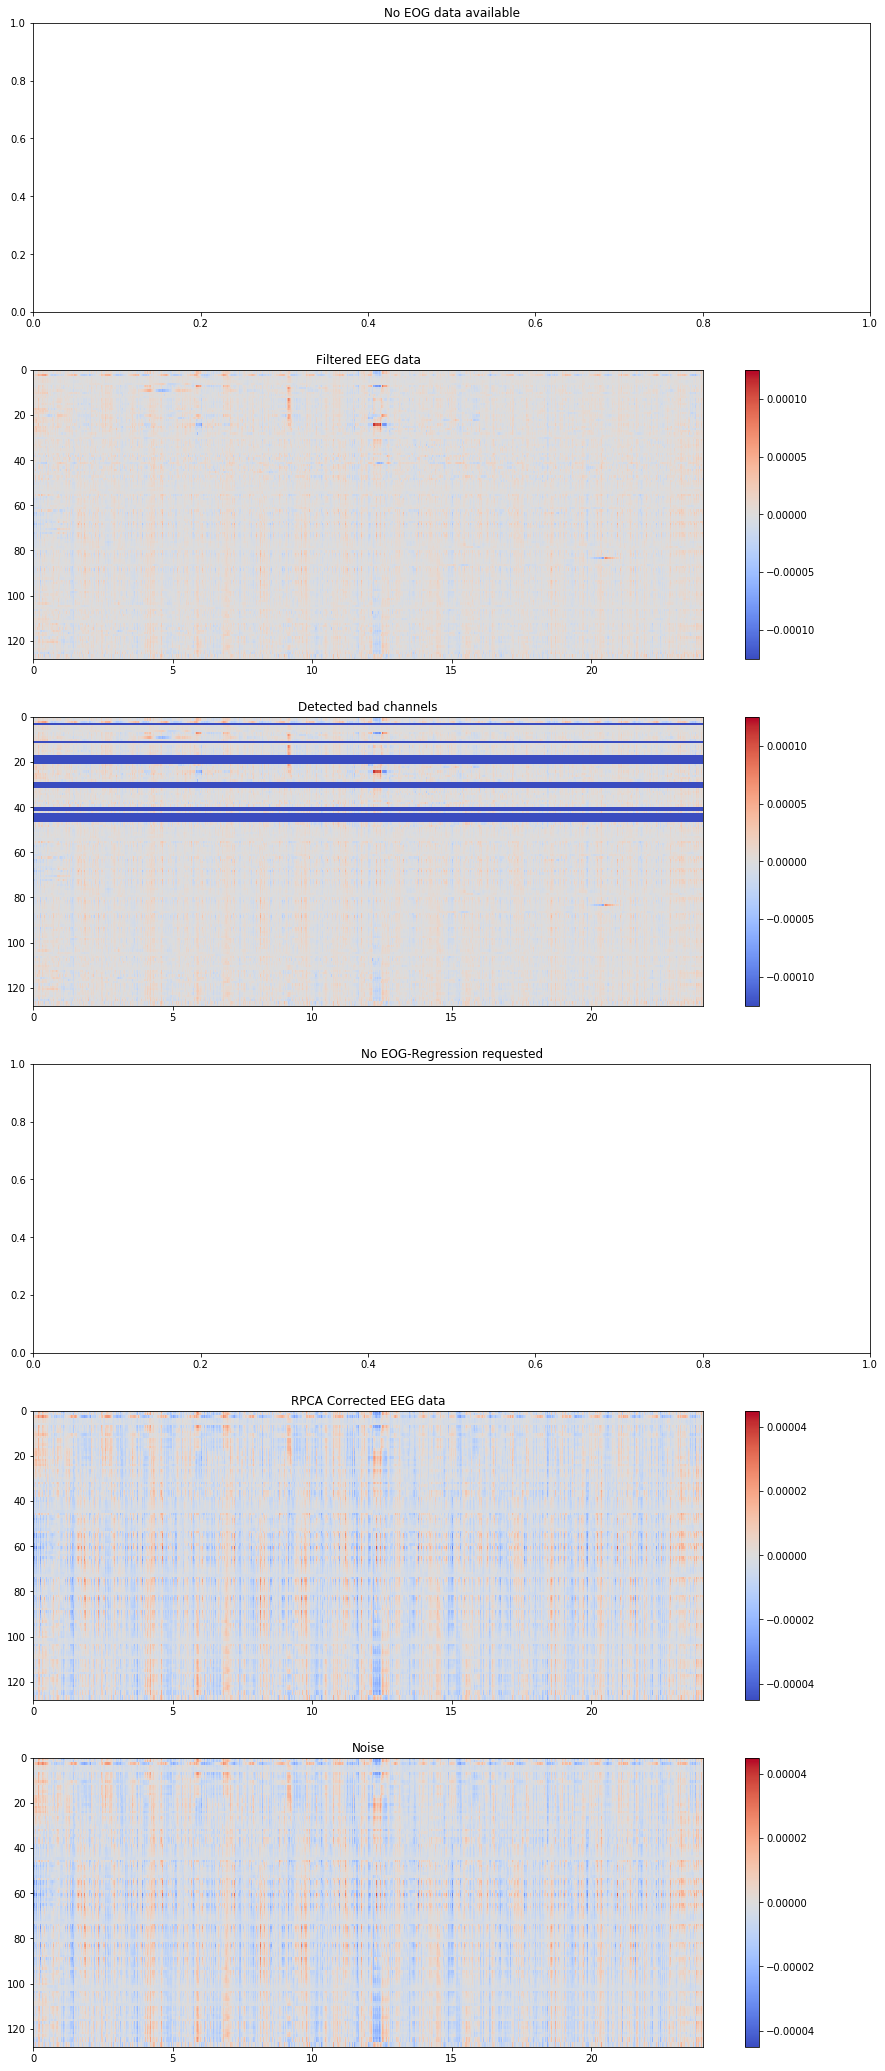

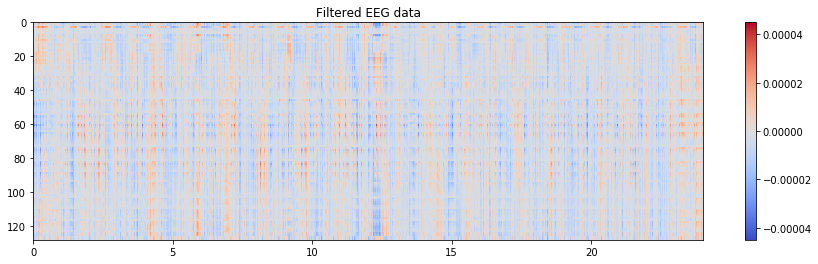

In [3]:
tutorial_project.preprocess_all()

# *Interpolate*
After all the files have been processed. You can go ahead and interpolate the blocks that are to be interpolated. For interpolation, use the interpolate_selected() method. The progress can be checked in log. After the interpolation is done, the results are stored in same format as in preprocessing.

In [0]:
tutorial_project.interpolate_selected()